# The Geometry of Linear Equations
视频课程链接：https://youtu.be/J7DzL2_Na80?si=rl0kZSVVkXZm7rg8

## row picture
$$
\begin{cases}
2x - y = 0 \\
-x + 2y = 3
\end{cases}
$$
$$
\begin{bmatrix}

2 & -1 \\
-1 & 2
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
0 \\
3
\end{bmatrix}
$$

In [62]:
import numpy as np

# 系数矩阵 A,arrey指数组
A = np.array([[2, -1],
              [-1, 2]])

# 向量 b
b = np.array([0, 3])

# 解方程组 Ax = b，np.linalg.solve() 是 NumPy 中用于解线性方程组的函数。
sol = np.linalg.solve(A, b)

print(f"解为: x = {sol[0]:.2f}, y = {sol[1]:.2f}")

解为: x = 1.00, y = 2.00


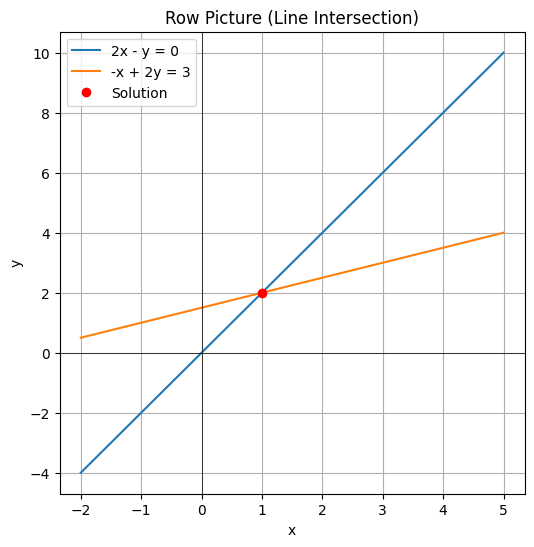

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 5, 400)#np.linspace(start, stop, num)

y1 = 2*x             # 2x - y = 0 → y = 2x
y2 = (x + 3)/2       # -x + 2y = 3 → y = (x + 3)/2

plt.figure(figsize=(6, 6))
plt.plot(x, y1, label='2x - y = 0')
plt.plot(x, y2, label='-x + 2y = 3')

# numpy求解交点，上一个cell已经求过了
plt.plot(sol[0], sol[1], 'ro', label='Solution')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Row Picture (Line Intersection)")
plt.show()

## Column Picture


$$
x \begin{bmatrix} 2 \\ -1 \end{bmatrix} + y \begin{bmatrix} -1 \\ 2 \end{bmatrix} = \begin{bmatrix} 0 \\ 3 \end{bmatrix}
$$


In [64]:
import numpy as np

A = np.array([[2, -1],
              [-1, 2]])
b = np.array([0, 3])

sol = np.linalg.solve(A, b)
print("Solution:", sol)

Solution: [1. 2.]


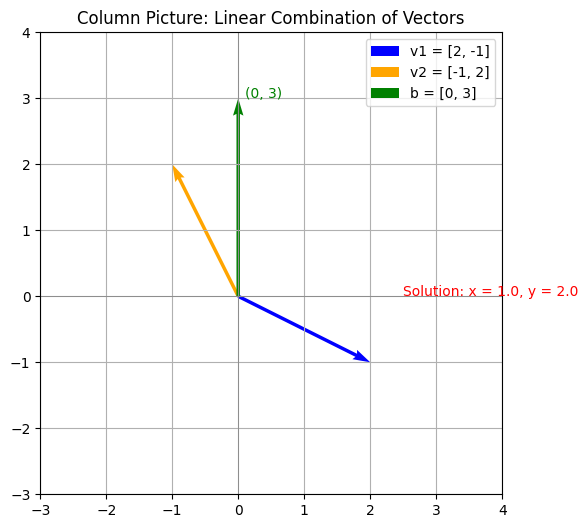

In [65]:
import matplotlib.pyplot as plt

v1 = np.array([2, -1])
v2 = np.array([-1, 2])
b = np.array([0, 3])

x_val, y_val = sol

# 计算线性组合结果（验证）
combo = x_val * v1 + y_val * v2

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# 绘制基础向量
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 = [2, -1]')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='v2 = [-1, 2]')

# 绘制线性组合（解向量）
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='green', label='b = [0, 3]')
plt.text(b[0] + 0.1, b[1], f"({b[0]}, {b[1]})", color='green')

# 标注解
plt.text(2.5, 0, f"Solution: x = {x_val}, y = {y_val}", color='red')

plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Column Picture: Linear Combination of Vectors")
plt.show()

## Matrix Transformation View

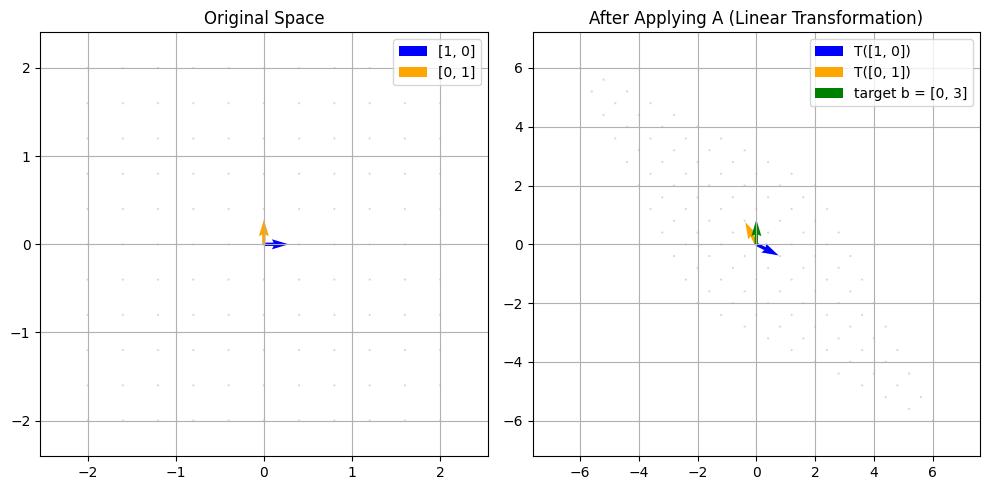

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# 原始向量空间中的单位网格
grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, 11), np.linspace(-2, 2, 11))
vectors = np.stack([grid_x.flatten(), grid_y.flatten()])

# 变换矩阵 A
A = np.array([[2, -1],
              [-1, 2]])

# 对网格应用线性变换 A
transformed = A @ vectors

# 绘图
plt.figure(figsize=(10, 5))

# 原空间
plt.subplot(1, 2, 1)
plt.quiver(vectors[0], vectors[1], np.zeros_like(vectors[0]), np.zeros_like(vectors[1]), angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.3)
plt.quiver(0, 0, 1, 0, color='blue', label='[1, 0]')
plt.quiver(0, 0, 0, 1, color='orange', label='[0, 1]')
plt.title("Original Space")
plt.axis('equal')
plt.grid(True)
plt.legend()

# 变换后空间
plt.subplot(1, 2, 2)
plt.quiver(transformed[0], transformed[1], np.zeros_like(transformed[0]), np.zeros_like(transformed[1]), angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.3)
plt.quiver(0, 0, A[0,0], A[1,0], color='blue', label='T([1, 0])')
plt.quiver(0, 0, A[0,1], A[1,1], color='orange', label='T([0, 1])')
plt.quiver(0, 0, 0, 3, color='green', label='target b = [0, 3]')
plt.title("After Applying A (Linear Transformation)")
plt.axis('equal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()